# XYZ Corp. : Default Rate Prediction and Analysis

Methodology
- Exploratory Data Analysis (EDA)
  - Data Cleaning
  - Variable Transformations
  - Plots to study trends
- Feature engineering and Variable Selection
- Model Building and Validation
    - Preprocessing
    - Model Building, testing and validation
    - Model selection
- Final results

In [1]:
# Loading all the required libraries
# Numpy and Pandas for data manipulation
import numpy as np
import pandas as pd
# Matplotlib for data visulaization
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
# For Modeling
import seaborn as sns
import sklearn

% matplotlib inline

In [2]:
# Views all rows and columns
pd.set_option("display.max_columns", None)

In [3]:
# Import Data
credit = pd.read_table('XYZCorp_LendingData.txt', sep= '\t', low_memory= False)

# Data Exploration

In [4]:
# Check columns name of the data
print('There are', len(credit.columns), 'columns:')
for x in credit.columns:
    print(x+ ' ', end= ',')

There are 73 columns:
id ,member_id ,loan_amnt ,funded_amnt ,funded_amnt_inv ,term ,int_rate ,installment ,grade ,sub_grade ,emp_title ,emp_length ,home_ownership ,annual_inc ,verification_status ,issue_d ,pymnt_plan ,desc ,purpose ,title ,zip_code ,addr_state ,dti ,delinq_2yrs ,earliest_cr_line ,inq_last_6mths ,mths_since_last_delinq ,mths_since_last_record ,open_acc ,pub_rec ,revol_bal ,revol_util ,total_acc ,initial_list_status ,out_prncp ,out_prncp_inv ,total_pymnt ,total_pymnt_inv ,total_rec_prncp ,total_rec_int ,total_rec_late_fee ,recoveries ,collection_recovery_fee ,last_pymnt_d ,last_pymnt_amnt ,next_pymnt_d ,last_credit_pull_d ,collections_12_mths_ex_med ,mths_since_last_major_derog ,policy_code ,application_type ,annual_inc_joint ,dti_joint ,verification_status_joint ,acc_now_delinq ,tot_coll_amt ,tot_cur_bal ,open_acc_6m ,open_il_6m ,open_il_12m ,open_il_24m ,mths_since_rcnt_il ,total_bal_il ,il_util ,open_rv_12m ,open_rv_24m ,max_bal_bc ,all_util ,total_rev_hi_lim ,inq_fi 

In [5]:
# Check top 5 rows of data
credit.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,n,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,n,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,n,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [6]:
# Check bottom 5 rows of data
credit.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
855964,36371250,39102635,10000.0,10000.0,10000.0,36 months,11.99,332.10,B,B5,Office Assistant,8 years,RENT,31000.0,Verified,Jan-2015,n,NaN,debt_consolidation,Debt consolidation,905xx,CA,28.69,0.0,Sep-2004,0.0,NaN,77.0,9.0,1.0,14037.0,82.1,15.0,f,7055.47,7055.47,3971.88,3971.88,2944.53,1027.35,0.0,0.0,0.0,Jan-2016,332.10,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,25274.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17100.0,NaN,NaN,NaN,0
855965,36441262,39152692,24000.0,24000.0,24000.0,36 months,11.99,797.03,B,B5,Director of Maintenance,10+ years,MORTGAGE,79000.0,Verified,Jan-2015,n,NaN,home_improvement,Home improvement,072xx,NJ,3.90,0.0,Mar-1974,1.0,26.0,NaN,5.0,0.0,8621.0,84.5,23.0,f,16933.26,16933.26,9532.39,9532.39,7066.74,2465.65,0.0,0.0,0.0,Jan-2016,797.03,Feb-2016,Jan-2016,0.0,29.0,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,140285.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10200.0,NaN,NaN,NaN,0
855966,36271333,38982739,13000.0,13000.0,13000.0,60 months,15.99,316.07,D,D2,Radiologist Technologist,5 years,RENT,35000.0,Verified,Jan-2015,n,NaN,debt_consolidation,Debt consolidation,378xx,TN,30.90,0.0,Sep-2003,0.0,NaN,84.0,9.0,1.0,11031.0,61.3,22.0,w,11155.50,11155.50,3769.74,3769.74,1844.50,1925.24,0.0,0.0,0.0,Jan-2016,316.07,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,34178.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18000.0,NaN,NaN,NaN,0
855967,36490806,39222577,12000.0,12000.0,12000.0,60 months,19.99,317.86,E,E3,Painter,1 year,RENT,64400.0,Source Verified,Jan-2015,n,NaN,debt_consolidation,Debt consolidation,010xx,MA,27.19,1.0,Oct-2003,2.0,22.0,NaN,17.0,0.0,8254.0,30.6,20.0,w,10447.31,10447.31,3787.67,3787.67,1552.69,2234.98,0.0,0.0,0.0,Jan-2016,317.86,Feb-2016,Jan-2016,1.0,22.0,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,58418.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27000.0,NaN,NaN,NaN,0
855968,36271262,38982659,20000.0,20000.0,20000.0,36 months,11.99,664.20,B,B5,Manager Hotel Operations Oasis,10+ years,RENT,100000.0,Verified,Jan-2015,n,NaN,credit_card,Credit card refinancing,331xx,FL,10.83,0.0,Dec-2001,1.0,NaN,110.0,8.0,1.0,33266.0,79.8,10.0,f,14110.94,14110.94,7943.76,7943.76,5889.06,2054.70,0.0,0.0,0.0,Jan-2016,664.20,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,33307.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41700.0,NaN,NaN,NaN,0


In [7]:
# Number of Rows and Columns in data
print("Number of columns (features) in the given data is :", credit.shape[1])
print("Number of rows (entries) in the given data is :" , credit.shape[0])

Number of columns (features) in the given data is : 73
Number of rows (entries) in the given data is : 855969


In [8]:
# check data type of all columns
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 73 columns):
id                             855969 non-null int64
member_id                      855969 non-null int64
loan_amnt                      855969 non-null float64
funded_amnt                    855969 non-null float64
funded_amnt_inv                855969 non-null float64
term                           855969 non-null object
int_rate                       855969 non-null float64
installment                    855969 non-null float64
grade                          855969 non-null object
sub_grade                      855969 non-null object
emp_title                      806530 non-null object
emp_length                     855969 non-null object
home_ownership                 855969 non-null object
annual_inc                     855969 non-null float64
verification_status            855969 non-null object
issue_d                        855969 non-null object
pymnt_plan           

In [9]:
# Check Missing values
credit_null=credit.isnull().sum(axis=0).sort_values(ascending= False)/float(len(credit))

In [10]:
# Check whose missing values greater 74 %
credit_null[credit_null>0.74]

dti_joint                      0.999486
annual_inc_joint               0.999484
verification_status_joint      0.999484
il_util                        0.986438
mths_since_rcnt_il             0.984890
inq_last_12m                   0.984476
total_bal_il                   0.984476
open_acc_6m                    0.984476
open_il_12m                    0.984476
open_il_24m                    0.984476
open_il_6m                     0.984476
open_rv_12m                    0.984476
total_cu_tl                    0.984476
max_bal_bc                     0.984476
all_util                       0.984476
open_rv_24m                    0.984476
inq_fi                         0.984476
desc                           0.857690
mths_since_last_record         0.846742
mths_since_last_major_derog    0.750997
dtype: float64

In [11]:
# Drop null values from data
credit.drop(credit_null[credit_null>0.74].index, axis=1, inplace= True)

In [12]:
# Check rows and columns after drop null values
print("Number of remaining columns (features) in the given data is :", credit.shape[1])
print("Number of rows (entries) in the given data is :" , credit.shape[0])

Number of remaining columns (features) in the given data is : 53
Number of rows (entries) in the given data is : 855969


In [13]:
# Check types of application and their percent
credit["application_type"].value_counts()/len(credit)*100

INDIVIDUAL    99.948363
JOINT          0.051637
Name: application_type, dtype: float64

In [14]:
# Check types of acc_now_delinq and their percent
credit['acc_now_delinq'].value_counts()/len(credit)*100

0.0     99.540871
1.0      0.431441
2.0      0.023132
3.0      0.003271
4.0      0.000701
5.0      0.000350
6.0      0.000117
14.0     0.000117
Name: acc_now_delinq, dtype: float64

In [15]:
# Check types of pymnt_plan and their percent
credit['pymnt_plan'].value_counts()/len(credit)

n    0.999994
y    0.000006
Name: pymnt_plan, dtype: float64

# Exploratry Data Analysis

After looking XYZCorp_Lending Data, we can also remove some of the variables, reasons are described below:
    1. id and member_id all are unique    
    2. plicy_code is always ==1
    3. payment_plan has only 10 years
    4. application_type is individual is around 0.99 % so this can also be removed
    5. acc_now_delinq is 0 for 99.5% of the records
    6. emp_title is not required
    7. zip_code is not required
    8. title can be removed
     
    


In [16]:
vars_must_removed= ['id','member_id','policy_code', 'application_type', 'pymnt_plan','acc_now_delinq','emp_title',\
                    'zip_code','title']

In [17]:
# drop the variables
credit.drop(vars_must_removed, axis=1, inplace= True)

In [18]:
# Remaining rows and columns in data
print("Number of remaining columns (features) in the given data is :", credit.shape[1])
print("Number of rows (entries) in the given data is :" , credit.shape[0])

Number of remaining columns (features) in the given data is : 44
Number of rows (entries) in the given data is : 855969


In [19]:
# Check null values
credit.isnull().sum()/len(credit)

loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_length                    0.000000
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
purpose                       0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line              0.000000
inq_last_6mths                0.000000
mths_since_last_delinq        0.513818
open_acc                      0.000000
pub_rec                       0.000000
revol_bal                     0.000000
revol_util                    0.000521
total_acc                     0.000000
initial_list_status      

In [20]:
# Fill null value with mean
credit['mths_since_last_delinq']=credit['mths_since_last_delinq'].fillna(credit['mths_since_last_delinq'].mean())

In [21]:
# Check next payment date and their values
credit['next_pymnt_d'].value_counts()

Feb-2016    534094
Jan-2016     68838
Mar-2016        66
Name: next_pymnt_d, dtype: int64

In [22]:
# Fill null values with mode
credit['next_pymnt_d']=credit['next_pymnt_d'].fillna('Feb-2016')

In [23]:
# Again check next payment date
credit['next_pymnt_d'].value_counts()

Feb-2016    787065
Jan-2016     68838
Mar-2016        66
Name: next_pymnt_d, dtype: int64

In [24]:
# Check remaining null values and their percent
credit.isnull().sum()/len(credit)*100

loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_length                    0.000000
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
purpose                       0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line              0.000000
inq_last_6mths                0.000000
mths_since_last_delinq        0.000000
open_acc                      0.000000
pub_rec                       0.000000
revol_bal                     0.000000
revol_util                    0.052105
total_acc                     0.000000
initial_list_status      

In [25]:
# Remove all null values from the data
credit=credit.dropna()

In [26]:
# Remaining rows and columns  
print("Number of remaining columns (features) in the given data is :", credit.shape[1])
print("Number of rows (entries) in the given data is :" , credit.shape[0])

Number of remaining columns (features) in the given data is : 44
Number of rows (entries) in the given data is : 779490


In [27]:
# Columns names of all variables
print('There are remaining', len(credit.columns), 'columns:')
for x in credit.columns:
    print(x+ ' ', end= ',')

There are remaining 44 columns:
loan_amnt ,funded_amnt ,funded_amnt_inv ,term ,int_rate ,installment ,grade ,sub_grade ,emp_length ,home_ownership ,annual_inc ,verification_status ,issue_d ,purpose ,addr_state ,dti ,delinq_2yrs ,earliest_cr_line ,inq_last_6mths ,mths_since_last_delinq ,open_acc ,pub_rec ,revol_bal ,revol_util ,total_acc ,initial_list_status ,out_prncp ,out_prncp_inv ,total_pymnt ,total_pymnt_inv ,total_rec_prncp ,total_rec_int ,total_rec_late_fee ,recoveries ,collection_recovery_fee ,last_pymnt_d ,last_pymnt_amnt ,next_pymnt_d ,last_credit_pull_d ,collections_12_mths_ex_med ,tot_coll_amt ,tot_cur_bal ,total_rev_hi_lim ,default_ind ,

# Categorical Plot

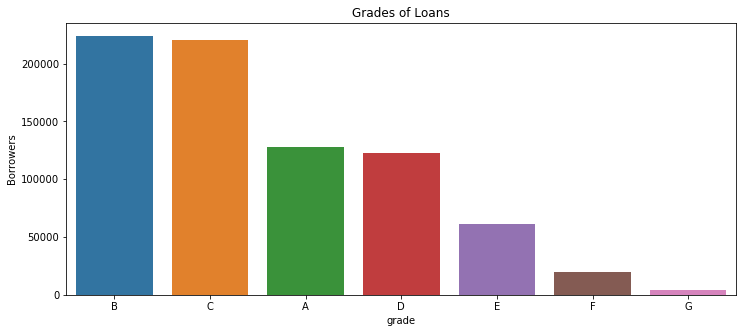

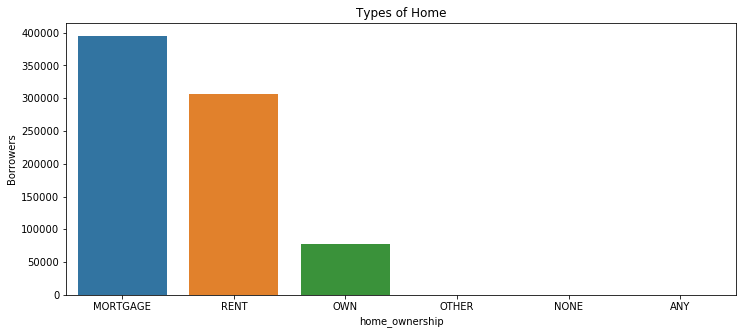

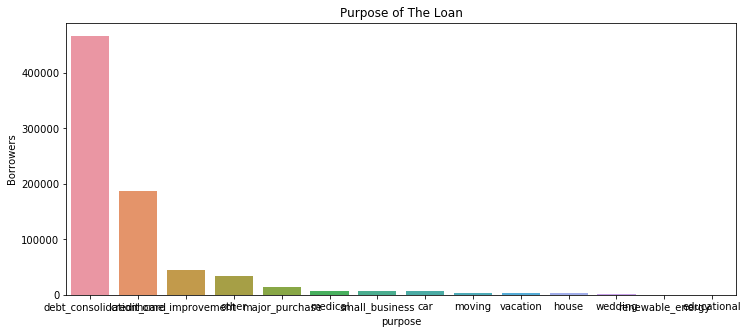

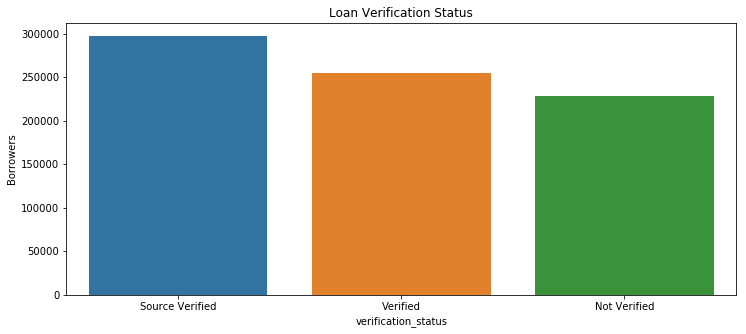

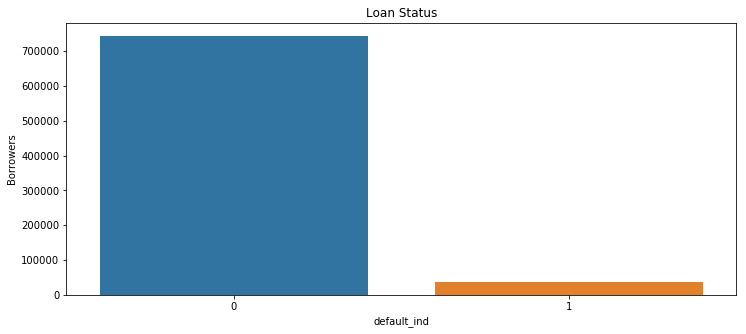

In [28]:
grade=credit['grade'].value_counts()
plt.figure(figsize=(12,5))
plt.title('Grades of Loans')
plt.ylabel('Borrowers')
plt.xlabel('grade')
sns.barplot(x=grade.index, y=grade.values)

home=credit['home_ownership'].value_counts()
plt.figure(figsize=(12,5))
plt.title('Types of Home')
plt.xlabel('home_ownership')
plt.ylabel('Borrowers')
sns.barplot(x=home.index, y=home.values)

purpose=credit['purpose'].value_counts()
plt.figure(figsize=(12,5))
plt.title('Purpose of The Loan')
plt.ylabel('Borrowers')
plt.xlabel('purpose')
sns.barplot(x=purpose.index, y=purpose.values)

verifi_status= credit['verification_status'].value_counts()
plt.figure(figsize=(12,5))
plt.title('Loan Verification Status')
plt.ylabel('Borrowers')
plt.xlabel('verification_status')
sns.barplot(x=verifi_status.index , y=verifi_status.values)

default=credit['default_ind'].value_counts()
plt.figure(figsize=(12,5))
plt.title('Loan Status')
plt.ylabel('Borrowers')
plt.xlabel('default_ind')
sns.barplot(x=default.index, y= default.values)

# Numerical Variables

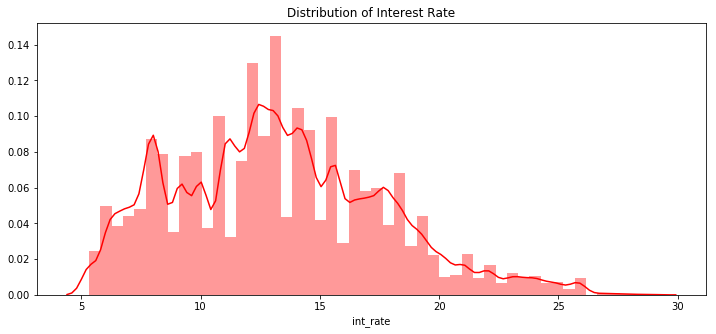

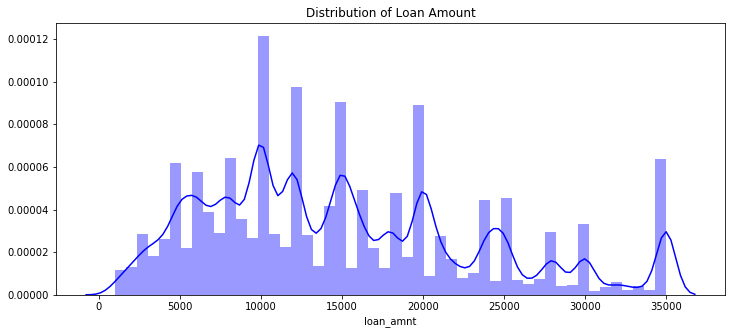

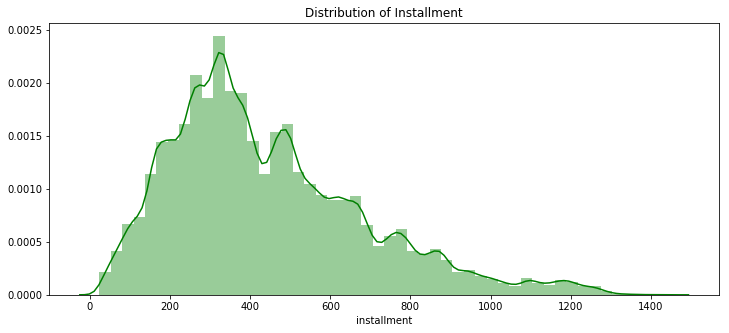

In [29]:
plt.figure(figsize=(12,5))
plt.title('Distribution of Interest Rate')
sns.distplot(credit['int_rate'], color='r')

plt.figure(figsize=(12,5))
plt.title('Distribution of Loan Amount')
sns.distplot(credit['loan_amnt'], color='b')

plt.figure(figsize=(12,5))
plt.title('Distribution of Installment')
sns.distplot(credit['installment'], color='g')

In [30]:
# Create new variables
credit['amt_difference'] = 'eq'
credit.loc[ ( credit['funded_amnt'] - credit['funded_amnt_inv']) > 0, 'amt_difference' ] = 'less'

In [31]:
# Check unique value in amt_difference
credit['amt_difference'].unique()

array(['eq', 'less'], dtype=object)

# Create new metric

In [32]:
# Create new variable
credit['acc_ratio'] = credit.open_acc / credit.total_acc

# Variable Transformation

In [33]:
# strip months from 'term' and make it an int
credit['term'] = credit['term'].str.split(' ').str[1]

# extract numbers from emp_length and fill missing values with the median
credit['emp_length'] = credit['emp_length'].str.extract('(\d+)').astype(float)

col_dates = credit.dtypes[credit.dtypes == 'datetime64[ns]'].index
for d in col_dates:
    credit[d] = credit[d].dt.to_period('M')

C:\Users\ankur\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)


# Outlier Detection

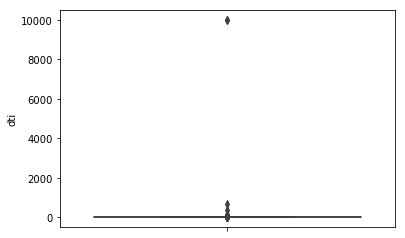

In [34]:
# Outlier detection in dti 
sns.boxplot(credit['dti'], orient= 'v')

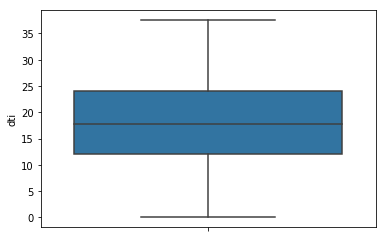

In [35]:
# Remove outlier on the basis of class interval
q = credit["dti"].quantile(0.99)
q
credit = credit[ (credit["dti"] <= q) | (credit["dti"].isnull())]
sns.boxplot(credit['dti'],orient= 'v')

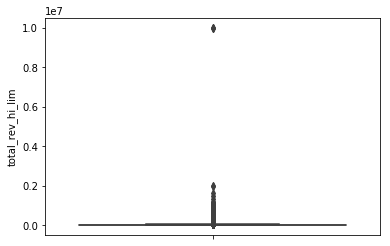

In [36]:
# Check outlier in 'total_rev_hi_lim'

sns.boxplot(credit['total_rev_hi_lim'], orient='v')

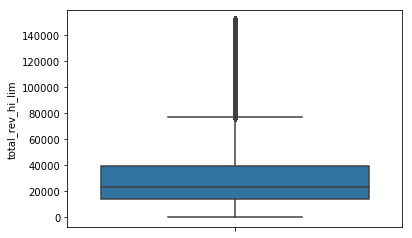

In [37]:
# Remove outlier on the basis of class interval

r = credit['total_rev_hi_lim'].quantile(0.99)
r
credit = credit[ (credit['total_rev_hi_lim'] <= r) | (credit['total_rev_hi_lim'].isnull())]
sns.boxplot(credit['total_rev_hi_lim'],orient= 'v')

In [38]:
# Row and cloumns in data
credit.shape

(764035, 46)

# Features Selection For Model

In [39]:
# Features selection
features= ['loan_amnt', 'amt_difference', 'term', 'installment', 'grade','emp_length','home_ownership', 'annual_inc', \
           'verification_status', 'purpose', 'dti','pub_rec','acc_ratio', 'initial_list_status', 'issue_d','default_ind']

In [40]:
# Extract features from data
status= credit[features]

In [41]:
# Check features
status.head()

,loan_amnt,amt_difference,term,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,pub_rec,acc_ratio,initial_list_status,issue_d,default_ind
39694,27050.0,eq,36,885.46,B,10.0,OWN,55000.0,Verified,debt_consolidation,22.87,0.0,0.518519,w,Dec-2013,0
39695,9750.0,eq,36,333.14,C,1.0,RENT,26000.0,Not Verified,debt_consolidation,25.12,0.0,0.428571,f,Dec-2013,0
39696,12000.0,eq,36,368.45,A,10.0,MORTGAGE,105000.0,Not Verified,debt_consolidation,14.05,0.0,0.545455,w,Dec-2013,0
39697,12000.0,eq,36,407.40,B,10.0,RENT,40000.0,Source Verified,debt_consolidation,16.94,2.0,0.218750,w,Dec-2013,0
39698,15000.0,eq,36,476.30,A,2.0,MORTGAGE,63000.0,Not Verified,debt_consolidation,16.51,0.0,0.275862,w,Dec-2013,0


In [42]:
# Row and Columns in features
status.shape

(764035, 16)

In [43]:
# Data types information of features
status.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 764035 entries, 39694 to 855968
Data columns (total 16 columns):
loan_amnt              764035 non-null float64
amt_difference         764035 non-null object
term                   764035 non-null object
installment            764035 non-null float64
grade                  764035 non-null object
emp_length             724651 non-null float64
home_ownership         764035 non-null object
annual_inc             764035 non-null float64
verification_status    764035 non-null object
purpose                764035 non-null object
dti                    764035 non-null float64
pub_rec                764035 non-null float64
acc_ratio              764035 non-null float64
initial_list_status    764035 non-null object
issue_d                764035 non-null object
default_ind            764035 non-null int64
dtypes: float64(7), int64(1), object(8)
memory usage: 99.1+ MB


In [46]:
status_num = status.select_dtypes(include = ['float64','int64'])
status_obj = status.select_dtypes(exclude = ['float64','int64'])

In [47]:
status_num.columns

Index(['loan_amnt', 'installment', 'emp_length', 'annual_inc', 'dti',
       'pub_rec', 'acc_ratio', 'default_ind'],
      dtype='object')

In [48]:
status_obj.columns

Index(['amt_difference', 'term', 'grade', 'home_ownership',
       'verification_status', 'purpose', 'initial_list_status', 'issue_d'],
      dtype='object')

In [49]:
from sklearn.preprocessing import MinMaxScaler

In [50]:
mms= MinMaxScaler()

In [51]:
status_num.loc[:, status_num.columns != "default_ind"] = mms.fit_transform(status_num.loc[:, status_num.columns !="default_ind"])

C:\Users\ankur\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [52]:
status_num.head()

,loan_amnt,installment,emp_length,annual_inc,dti,pub_rec,acc_ratio,default_ind
39694,0.766176,0.606244,1.000000,0.005475,0.608245,0.000000,0.499259,0
39695,0.257353,0.217888,0.000000,0.002422,0.668085,0.000000,0.405714,0
39696,0.323529,0.242716,1.000000,0.010740,0.373670,0.000000,0.527273,0
39697,0.323529,0.270103,1.000000,0.003896,0.450532,0.023256,0.187500,0
39698,0.411765,0.318549,0.111111,0.006318,0.439096,0.000000,0.246897,0


In [53]:
status =status_num.join(status_obj)

In [54]:
status.head()

,loan_amnt,installment,emp_length,annual_inc,dti,pub_rec,acc_ratio,default_ind,amt_difference,term,grade,home_ownership,verification_status,purpose,initial_list_status,issue_d
39694,0.766176,0.606244,1.000000,0.005475,0.608245,0.000000,0.499259,0,eq,36,B,OWN,Verified,debt_consolidation,w,Dec-2013
39695,0.257353,0.217888,0.000000,0.002422,0.668085,0.000000,0.405714,0,eq,36,C,RENT,Not Verified,debt_consolidation,f,Dec-2013
39696,0.323529,0.242716,1.000000,0.010740,0.373670,0.000000,0.527273,0,eq,36,A,MORTGAGE,Not Verified,debt_consolidation,w,Dec-2013
39697,0.323529,0.270103,1.000000,0.003896,0.450532,0.023256,0.187500,0,eq,36,B,RENT,Source Verified,debt_consolidation,w,Dec-2013
39698,0.411765,0.318549,0.111111,0.006318,0.439096,0.000000,0.246897,0,eq,36,A,MORTGAGE,Not Verified,debt_consolidation,w,Dec-2013


In [55]:
# Name of the columns
status.columns

Index(['loan_amnt', 'installment', 'emp_length', 'annual_inc', 'dti',
       'pub_rec', 'acc_ratio', 'default_ind', 'amt_difference', 'term',
       'grade', 'home_ownership', 'verification_status', 'purpose',
       'initial_list_status', 'issue_d'],
      dtype='object')

In [56]:
# Rearrange the order
status =status[['loan_amnt', 'installment', 'emp_length', 'annual_inc', 'dti',
       'pub_rec', 'acc_ratio', 'issue_d', 'amt_difference', 'term',
       'grade', 'home_ownership', 'verification_status', 'purpose',
       'initial_list_status', 'default_ind']]

In [57]:
status['issue_d'].unique()

array(['Dec-2013', 'Nov-2013', 'Oct-2013', 'Sep-2013', 'Aug-2013',
       'Jul-2013', 'Jun-2013', 'May-2013', 'Apr-2013', 'Mar-2013',
       'Feb-2013', 'Jan-2013', 'Dec-2012', 'Nov-2012', 'Oct-2012',
       'Sep-2012', 'Aug-2012', 'Dec-2014', 'Nov-2014', 'Oct-2014',
       'Sep-2014', 'Aug-2014', 'Jul-2014', 'Jun-2014', 'May-2014',
       'Apr-2014', 'Mar-2014', 'Feb-2014', 'Jan-2014', 'Dec-2015',
       'Nov-2015', 'Oct-2015', 'Sep-2015', 'Aug-2015', 'Jul-2015',
       'Jun-2015', 'May-2015', 'Apr-2015', 'Mar-2015', 'Feb-2015',
       'Jan-2015'], dtype=object)

# Split the data

 train_range ( June 2007 - May 2015 ) and test_range ( June 2015 - Dec 2015 )

In [58]:
# select test range data on the basis of month
test_data_range = ['Jun-2015','Jul-2015','Aug-2015','Sep-20015', 'Oct-2015','Nov-2015', 'Dec-2015']

In [59]:
# Extract test data from status variable
test= status.loc[status['issue_d'].isin(test_data_range)]

In [60]:
# Extract train data from status variable
train= status.loc[-status['issue_d'].isin(test_data_range)]

In [61]:
# Check rows and columns in Test and Train data sets
print(test.shape, train.shape)

(213911, 16) (550124, 16)


In [62]:
# Select dummy variables in train data
dummy= train.loc[:,train.dtypes==np.object]

In [63]:
# Check columns in dummy 
dummy.columns

Index(['issue_d', 'amt_difference', 'term', 'grade', 'home_ownership',
       'verification_status', 'purpose', 'initial_list_status'],
      dtype='object')

In [64]:
# Remove issue_d from dummy
dummy=dummy.drop('issue_d', axis= 1)

In [65]:
# Rows and columns in dummy
dummy.shape

(550124, 7)

In [66]:
# Create dummies 
dummy= pd.get_dummies(dummy)

In [67]:
# Rows and columns in dummy
dummy.shape

(550124, 36)

drop original columns

In [68]:
# Remove dummy variable from train because it create duplication in train 
train = train.drop(['amt_difference', 'term', 'grade', 'home_ownership','verification_status', 'purpose', 'initial_list_status'], axis=1)

In [69]:
# check remaining columns in train
train.columns

Index(['loan_amnt', 'installment', 'emp_length', 'annual_inc', 'dti',
       'pub_rec', 'acc_ratio', 'issue_d', 'default_ind'],
      dtype='object')

In [70]:
# add dummy variable with train
train= train.join(dummy)

In [71]:
# Rows and columns in train data
train.shape

(550124, 45)

In [72]:
# Check variables name in train data
train.columns

Index(['loan_amnt', 'installment', 'emp_length', 'annual_inc', 'dti',
       'pub_rec', 'acc_ratio', 'issue_d', 'default_ind', 'amt_difference_eq',
       'amt_difference_less', 'term_36', 'term_60', 'grade_A', 'grade_B',
       'grade_C', 'grade_D', 'grade_E', 'grade_F', 'grade_G',
       'home_ownership_ANY', 'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'initial_list_status_f',
       'initial_list_status_w'],
      dtype='object')

In [73]:
# Rearrange the order
train= train[['loan_amnt', 'installment', 'emp_length', 'annual_inc', 'dti',
       'pub_rec', 'acc_ratio', 'issue_d','amt_difference_eq',
       'amt_difference_less', 'term_36', 'term_60', 'grade_A', 'grade_B',
       'grade_C', 'grade_D', 'grade_E', 'grade_F', 'grade_G',
       'home_ownership_ANY', 'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'initial_list_status_f',
       'initial_list_status_w','default_ind']]

In [74]:
# Extract independent variables from train data
x_train= train.iloc[:,:44]

In [75]:
# Check variables names in x_train
x_train.columns

Index(['loan_amnt', 'installment', 'emp_length', 'annual_inc', 'dti',
       'pub_rec', 'acc_ratio', 'issue_d', 'amt_difference_eq',
       'amt_difference_less', 'term_36', 'term_60', 'grade_A', 'grade_B',
       'grade_C', 'grade_D', 'grade_E', 'grade_F', 'grade_G',
       'home_ownership_ANY', 'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'initial_list_status_f',
       'initial_list_status_w'],
      dtype='object')

In [76]:
# Extract dependent variables from train data
y_train=train['default_ind']

In [77]:
# Rows and columns in x_train and y_train
print(x_train.shape, y_train.shape)

(550124, 44) (550124,)


In [78]:
# Extract object variables in dummy 1 variables
dummy1= test.loc[:,test.dtypes==np.object]

In [79]:
# Columns names in dummy1 variables
dummy1.columns

Index(['issue_d', 'amt_difference', 'term', 'grade', 'home_ownership',
       'verification_status', 'purpose', 'initial_list_status'],
      dtype='object')

In [80]:
# drop issue_d from dummy1
dummy1= dummy1.drop('issue_d', axis=1)

In [81]:
# create dummy variable
dummy1= pd.get_dummies(dummy1)

In [82]:
# Check columns names in dummy variables
dummy1.columns

Index(['amt_difference_eq', 'amt_difference_less', 'term_36', 'term_60',
       'grade_A', 'grade_B', 'grade_C', 'grade_D', 'grade_E', 'grade_F',
       'grade_G', 'home_ownership_ANY', 'home_ownership_MORTGAGE',
       'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'initial_list_status_f',
       'initial_list_status_w'],
      dtype='object')

In [83]:
# Drop object variables in test data
test= test.drop(['amt_difference', 'term', 'grade', 'home_ownership','verification_status', 'purpose', 'initial_list_status'], axis=1)

In [84]:
# Columns name in test data variable
test.columns

Index(['loan_amnt', 'installment', 'emp_length', 'annual_inc', 'dti',
       'pub_rec', 'acc_ratio', 'issue_d', 'default_ind'],
      dtype='object')

In [85]:
# Join dummy variable with test
test= test.join(dummy1)

In [86]:
# print columns names in test data
test.columns

Index(['loan_amnt', 'installment', 'emp_length', 'annual_inc', 'dti',
       'pub_rec', 'acc_ratio', 'issue_d', 'default_ind', 'amt_difference_eq',
       'amt_difference_less', 'term_36', 'term_60', 'grade_A', 'grade_B',
       'grade_C', 'grade_D', 'grade_E', 'grade_F', 'grade_G',
       'home_ownership_ANY', 'home_ownership_MORTGAGE', 'home_ownership_OWN',
       'home_ownership_RENT', 'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'initial_list_status_f',
       'initial_list_status_w'],
      dtype='object')

In [87]:
# Reorder variables in test data
test= test[['loan_amnt', 'installment', 'emp_length', 'annual_inc', 'dti',
       'pub_rec', 'acc_ratio', 'issue_d', 'amt_difference_eq',
       'amt_difference_less', 'term_36', 'term_60', 'grade_A', 'grade_B',
       'grade_C', 'grade_D', 'grade_E', 'grade_F', 'grade_G',
       'home_ownership_ANY', 'home_ownership_MORTGAGE', 'home_ownership_OWN',
       'home_ownership_RENT', 'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'initial_list_status_f',

            'initial_list_status_w', 'default_ind']]

In [88]:
# Rows and columns in test data
test.shape

(213911, 42)

In [89]:
# Extract independent variables from test data
x_test=test.iloc[:,:41]

In [90]:
# Extract dependent variables from test data
y_test= test['default_ind']

In [91]:
# Rows and columns in model
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(550124, 44) (213911, 41) (550124,) (213911,)


In [92]:
# For compare columns in test and train data 
print(x_train.columns, x_test.columns)

Index(['loan_amnt', 'installment', 'emp_length', 'annual_inc', 'dti',
       'pub_rec', 'acc_ratio', 'issue_d', 'amt_difference_eq',
       'amt_difference_less', 'term_36', 'term_60', 'grade_A', 'grade_B',
       'grade_C', 'grade_D', 'grade_E', 'grade_F', 'grade_G',
       'home_ownership_ANY', 'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'initial_list_status_f',
       'initial_list_status_w'],
      dtype='object') Index(['loan_amnt', 'installmen

In [93]:
# These columns are not present in x_test data so these are remove from x_train data
x_train.drop(['home_ownership_NONE', 'home_ownership_OTHER', 'purpose_educational'], axis= 1, inplace= True)

In [94]:
# Total rows and columns
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(550124, 41)
(213911, 41)
(550124,)
(213911,)


In [95]:
# Data types informations of Test and Train data
print(x_train.info(), x_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 550124 entries, 39694 to 855968
Data columns (total 41 columns):
loan_amnt                              550124 non-null float64
installment                            550124 non-null float64
emp_length                             523094 non-null float64
annual_inc                             550124 non-null float64
dti                                    550124 non-null float64
pub_rec                                550124 non-null float64
acc_ratio                              550124 non-null float64
issue_d                                550124 non-null object
amt_difference_eq                      550124 non-null uint8
amt_difference_less                    550124 non-null uint8
term_36                                550124 non-null uint8
term_60                                550124 non-null uint8
grade_A                                550124 non-null uint8
grade_B                                550124 non-null uint8
grade_C         

In [96]:
# Drop issue_d from test and train data 
x_train= x_train.drop('issue_d', axis= 1)
x_test= x_test.drop('issue_d', axis= 1)

In [97]:
# Print all rows and columns in Test and Train
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(550124, 40)
(213911, 40)
(550124,)
(213911,)


# Proceed with Modeling. We will use the following algorithum
1. Logistic Regression
2. Decision Trees
3. Random Forest

# Logistic Regression

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
lr= LogisticRegression()
lr.fit(x_train, y_train)
lr_predict= lr.predict(x_test)

C:\Users\ankur\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
# Print confusion Matrix and accuracy score
lr_conf_matrix= confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print(lr_conf_matrix)
print(lr_acc_score*100)

# 99 % accuracy with logistic regression! Let's see with Decision Trees gives us better accuracy

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier ()
dt.fit(x_train, y_train)
dt_predict= dt.predict(x_test)

In [ ]:
# Print confusion Matrix and accuracy score
dt_conf_matrix= confusion_matrix(y_test, dt_predict)
dt_acc_score = accuracy_score(y_test, dt_predict)
print(dt_conf_matrix)
print(dt_acc_score*100)

# 93% accuracy with Decision Trees. Lesser accuracy with Decision Trees ! Let's use Random forest Classifier now

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_predict= rf.predict(x_test)

In [ ]:
# print confusion matrix and accuracy score
rf_conf_matrix= confusion_matrix(y_test, dt_predict)
rf_acc_score = accuracy_score(y_test, rf_predict)
print(rf_conf_matrix)
print(rf_acc_score*100)

# 99% accuracy with Random Forest Classifier. Similar accuracy as Logistic Regression.